Q2

Steinberg-Floyd Dithering:A more aesthetically pleasing outcome is produced by this technique, which shares a pixel's quantization mistake among its nearby pixels, particularly in gradient photos.

Judice-Jarvis-Ninke Dithering:Though it spreads mistake over a greater number of nearby pixels, this approach is similar to Floyd-Steinberg. Even higher quality is offered at the expense of more computing complexity.

Comparison: The Floyd-Steinberg dithered image ought to show a gradient that is comparatively smooth. The more widespread error distribution in the Jarvis-Judice-Ninke dithered image may reveal finer features.

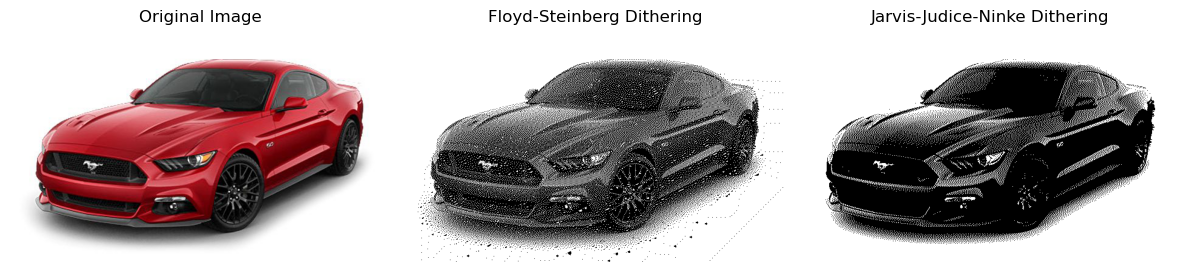

In [3]:

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def floyd_steinberg(image):
    # Converting the original image to grayscale
    gray_img = image.convert('L')
    pixels = np.array(gray_img)
    lent, breadth = pixels.shape
    
    # New image creating for  the output
    dithered_image = np.copy(pixels)
    
    for y in range(lent):
        for x in range(breadth):
            old_pixel = dithered_image[y, x] 
            new_pixel = 255 * (old_pixel > 127)  
            dithered_image[y, x] = new_pixel
            quant_error = old_pixel - new_pixel
            
            # Spreading the error to neighboring pixels
            if x + 1 < breadth:
                dithered_image[y, x + 1] += quant_error * 7 / 16
            if x - 1 >= 0 and y + 1 < lent:
                dithered_image[y + 1, x - 1] += quant_error * 3 / 16
            if y + 1 < lent:
                dithered_image[y + 1, x] += quant_error * 5 / 16
            if x + 1 < breadth and y + 1 < lent:
                dithered_image[y + 1, x + 1] += quant_error * 1 / 16
    
    return Image.fromarray(np.clip(dithered_image, 0, 255).astype('uint8'))

def jarvis_judice(image):
    # Converting image to grayscale
    gray_img = image.convert('L')
    pixels = np.array(gray_img)
    lent, breadth = pixels.shape
    
    # Creating a new image for the output
    dithered_image = np.copy(pixels)
    
    for y in range(lent):
        for x in range(breadth):
            old_pixel = dithered_image[y, x]
            new_pixel = 255 * (old_pixel > 127)  
            dithered_image[y, x] = new_pixel
            quant_error = old_pixel - new_pixel
            
            # Spreading the error to neighboring pixels
            if x + 1 < breadth:
                dithered_image[y, x + 1] += quant_error * 7 / 48
            if x + 2 < breadth:
                dithered_image[y, x + 2] += quant_error * 5 / 48
            if y + 1 < lent and x - 1 >= 0:
                dithered_image[y + 1, x - 1] += quant_error * 3 / 48
            if y + 1 < lent:
                dithered_image[y + 1, x] += quant_error * 5 / 48
            if y + 1 < lent and x + 1 < breadth:
                dithered_image[y + 1, x + 1] += quant_error * 3 / 48
            if y + 1 < lent and x + 2 < breadth:
                dithered_image[y + 1, x + 2] += quant_error * 1 / 48
            
    return Image.fromarray(np.clip(dithered_image, 0, 255).astype('uint8'))

# Image Loading
image_path = 'ford.jpg'  # Change this to your image path
image = Image.open(image_path)

#  dithering algorithms
floyd_steinberg_result = floyd_steinberg(image)
jarvis_judice_ninke_result = jarvis_judice(image)

# Plotting the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(floyd_steinberg_result, cmap='gray')
plt.title('Floyd-Steinberg Dithering')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(jarvis_judice_ninke_result, cmap='gray')
plt.title('Jarvis-Judice-Ninke Dithering')
plt.axis('off')

plt.tight_layout()
plt.show()